In [1]:
import numpy as np
import pandas as pd
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
# import cv2
import os, glob
import tensorflow as tf
from tqdm import tqdm
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split
from keras.utils import to_categorical

from keras.models import Model, Sequential, load_model
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPool2D, BatchNormalization, GlobalAveragePooling2D,Activation,Input
from tensorflow.keras.optimizers import Adam
from keras.preprocessing.image import ImageDataGenerator
from PIL import ImageFile
ImageFile.LOAD_TRUNCATED_IMAGES = True

In [2]:
data_dir=r'C:\Users\sudha\Downloads\train\train'
Classes=[]
for file in os.listdir(data_dir):
    Classes+=[file]
print(Classes)
print(len(Classes))

['negative', 'neutral', 'positive', 'very_negative', 'very_positive']
5


In [3]:
test_datagen = ImageDataGenerator(rescale=1. / 255,validation_split=0.2)
training_set = test_datagen.flow_from_directory(data_dir,
                                                 target_size=(224,224),
                                                 batch_size=12,
                                                 class_mode='categorical',
                                                 subset='training'
                                                 )

test_set = test_datagen.flow_from_directory(data_dir,
                                            target_size=(224,224),
                                            batch_size=12,
                                            class_mode='categorical',
                                            subset='validation'
                                            )


Found 3200 images belonging to 5 classes.
Found 800 images belonging to 5 classes.


In [17]:
base_model = tf.keras.applications.MobileNet(input_shape=(224,224, 3), include_top=False,
                          weights='imagenet')
model = Sequential()
model.add(base_model)
model.add(GlobalAveragePooling2D())
model.add(Dense(64, activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.2))
model.add(Dense(5, activation='sigmoid'))
model.summary()


# from tensorflow.keras.applications import MobileNet
# from tensorflow.keras.models import Model
# from tensorflow.keras.layers import GlobalAveragePooling2D, Dense, Dropout, BatchNormalization

# # Load pre-trained MobileNet without the top layer
# base_model = MobileNet(input_shape=(224,224, 3), include_top=False, weights='imagenet')

# # Freeze the weights of the base model
# base_model.trainable = False

# # Add your custom classifier on top
# x = GlobalAveragePooling2D()(base_model.output)
# x = Dense(64, activation='relu')(x)
# x = BatchNormalization()(x)
# x = Dropout(0.5)(x)  # Increase dropout rate
# output = Dense(5, activation='softmax')(x)  # Use softmax for multi-class classification

# # Create a new model
# model = Model(inputs=base_model.input, outputs=output)

# # Compile the model
# model.compile(optimizer='Adam', loss="categorical_crossentropy", metrics=["accuracy"])
# model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 mobilenet_1.00_224 (Functi  (None, 7, 7, 1024)        3228864   
 onal)                                                           
                                                                 
 global_average_pooling2d_2  (None, 1024)              0         
  (GlobalAveragePooling2D)                                       
                                                                 
 dense_4 (Dense)             (None, 64)                65600     
                                                                 
 batch_normalization_2 (Bat  (None, 64)                256       
 chNormalization)                                                
                                                                 
 dropout_2 (Dropout)         (None, 64)                0         
                                                      

In [18]:
model.compile(optimizer='Adam', loss="categorical_crossentropy", metrics=["accuracy"])
hist=model.fit(training_set,epochs=25,validation_data=test_set,verbose=1)
# Train the model with early stopping
# from tensorflow.keras.callbacks import EarlyStopping

# early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

# hist = model.fit(training_set, epochs=25, validation_data=test_set, callbacks=[early_stopping], verbose=1)


Epoch 1/25
267/267 [==============================] - 215s 761ms/step - loss: 1.5600 - accuracy: 0.3678 - val_loss: 1.8817 - val_accuracy: 0.2837
Epoch 2/25
267/267 [==============================] - 188s 703ms/step - loss: 1.0651 - accuracy: 0.5259 - val_loss: 1.9784 - val_accuracy: 0.2637
Epoch 3/25
267/267 [==============================] - 184s 688ms/step - loss: 0.8269 - accuracy: 0.6416 - val_loss: 2.4829 - val_accuracy: 0.2325
Epoch 4/25
267/267 [==============================] - 198s 740ms/step - loss: 0.7043 - accuracy: 0.6963 - val_loss: 2.6831 - val_accuracy: 0.2200
Epoch 5/25
267/267 [==============================] - 202s 757ms/step - loss: 0.6062 - accuracy: 0.7491 - val_loss: 3.6509 - val_accuracy: 0.2387
Epoch 6/25
267/267 [==============================] - 247s 927ms/step - loss: 0.4868 - accuracy: 0.8066 - val_loss: 2.8263 - val_accuracy: 0.2362
Epoch 7/25
267/267 [==============================] - 326s 1s/step - loss: 0.4688 - accuracy: 0.8238 - val_loss: 3.4828 - va

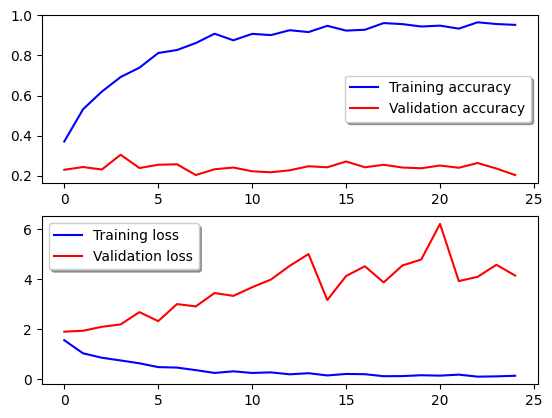

In [10]:
fig, ax = plt.subplots(2, 1)

# Plotting accuracy
ax[0].plot(hist.history['accuracy'], color='b', label="Training accuracy")
ax[0].plot(hist.history['val_accuracy'], color='r', label="Validation accuracy")
legend = ax[0].legend(loc='best', shadow=True)


# Plotting loss
ax[1].plot(hist.history['loss'], color='b', label="Training loss")
ax[1].plot(hist.history['val_loss'], color='r', label="Validation loss")
legend = ax[1].legend(loc='best', shadow=True)


In [15]:
model.evaluate(test_set)
model.save("models/Model.h5")

67/67 [==============================] - 10s 152ms/step - loss: 1.6755 - accuracy: 0.1787


1/1 [==============================] - 1s 942ms/step


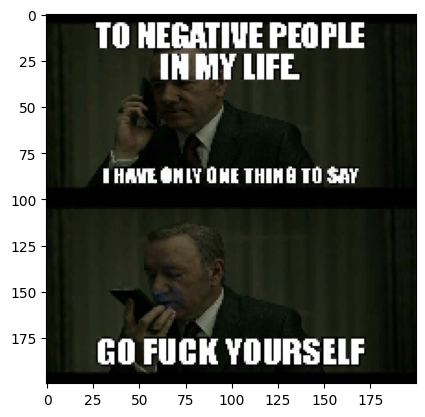

Prediction: very_negative
Extracted Text: TO NEGATIVE PEOPLE IN MY LIFE. THAWE ONLY ONE THING T0 SAY GO FUCK YOURSELF


In [16]:
from skimage import io
from tensorflow.keras.preprocessing import image

img = image.load_img(r'C:\Users\sudha\OneDrive\Desktop\ti2.jpg', grayscale=False, target_size=(224,224))
show_img=image.load_img(r'C:\Users\sudha\OneDrive\Desktop\ti2.jpg', grayscale=False, target_size=(200, 200))
Classes = Classes
x = image.img_to_array(img)
x = np.expand_dims(x, axis = 0)

x /= 255

custom = model.predict(x)
predicted_class = Classes[np.argmax(custom[0])]

from pytesseract import pytesseract

# Perform OCR using pytesseract
pytesseract.tesseract_cmd = r'C:\Program Files\Tesseract-OCR\tesseract.exe'
text = pytesseract.image_to_string(img)

# Display the image
plt.imshow(show_img)
plt.show()

if not text.strip():
    predicted_class = "neutral"

cleaned_text = ' '.join(text.split())  # Remove extra whitespaces and newlines
print('Prediction:', predicted_class)
print("Extracted Text:", cleaned_text if cleaned_text else "No text found")